<a href="https://colab.research.google.com/github/code4tomorrow/machine-learning/blob/main/2_intermediate/chapter2/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Notebook

In this notebook, we will implement logistic regression on a heart disease dataset, where given information about a patient, we'll be trying to predict whether or not they're at risk of heart disease.

## Import Libraries

First, let's implement the necessary libraries: pandas and seaborn (a data visualization library). Running %matplotlib inline will allow us to actually see the visualizzatiosn of our data later on.

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline

## Import Data
Now let's upload data into the notebook. Click the button "Choose Files" and upload the file 'heart.csv'

In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
heart_df = pd.read_csv('heart.csv')

In [5]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis
Let's briefly explore our data to get a better understanding of it.

Here are some of the most important features in the data:

**cp: chest pain type**
- Value 0: asymptomatic
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: typical angina

**restecg: resting electrocardiographic results**
- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
- Value 1: normal
- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**slope: the slope of the peak exercise ST segment**
0: downsloping; 1: flat; 2: upsloping

**thal:** 1 = fixed defect; 2 = normal; 7 = reversable defect

**target:** 0 = disease, 1 = no disease

We can run the `info()` and `describe()` methods on our data to learn more about each feature.

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Next, let's see if there are any null values in our data. If so, we might need to drop features with these null values. We can find the amount of null values for each feature by running `heart_df.isnull().sum()`.

In [ ]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Now, let's try visualizing our data using seaborn, a powerful data visualization library. We can use the `sns.pairplot()` method, which plots every feature against each other, to find trends/correlations within our data. Can you spot any interesting relationships?

In [ ]:
sns.pairplot(heart_df)

We can also find correlations between different features by creating a heatmap of `heart_df.corr()`, which returns a 2d array of the correlation every pair of features. Here, brighter pixels represent positive correlations whereas darker pixels represent inverse correlations. Can you spot any interesting relationships?

In [ ]:
sns.heatmap(heart_df.corr())

Although many features are unknown (like "fbs" or "caa"), we can play around with the age feature to find some interesting relationships. For example, we can run `sns.distplot()` on our age feature to see the distribution of patient ages.

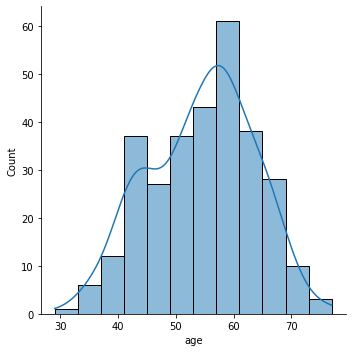

In [ ]:
sns.displot(heart_df['age'], kde=True)

We can also try plotting the age feature against other features like chol (which stands for cholesterol level) and the output (which represents whether a patient has heart disease or not). What do you notice in terms of their relationships?

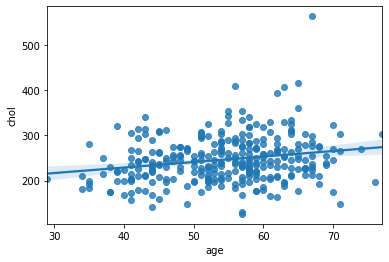

In [ ]:
sns.regplot(x=heart_df['age'], y=heart_df['chol'])

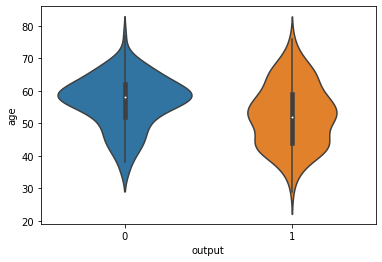

In [ ]:
sns.violinplot(x=heart_df['output'], y=heart_df['age'])

## Train Test Split
Finally, let's start building a logistic regression model! First, however, we'll have to split our data into train and test data using `train_test_split()` from the sklearn.model_selection library. This will allow us to evaluate how well our model performs.

In [ ]:
from sklearn.model_selection import train_test_split

Since the inputs to our model will be every feature except for `output`, we set that equal to X. And since the `output` feature of the dataframe stores the outputs of our model, we set that equal to y. Finally, we can call the train_test_split, which separates our data into train and test data (70% will be train data, 30% will be test data).

In [ ]:
X = heart_df.drop('output', axis=1)
y = heart_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Logistic Regression Model
To build a logistic regression model, we first need to import it from the sklearn.linear_model library.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

After we've initialized our model, we can now fit it to our train data, which is `X_train` and `y_train`.

In [ ]:
model.fit(X_train, y_train)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Finally, we can use our trained model to make predictions on the test set. What do you think the predictions array will look like?

In [ ]:
predictions = model.predict(X_test)
print(predictions)

Let's use the `classification_report()` and `confusion_matrix()` methods from sklearn.metrics to see how well our baseline model did.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

## Great Job!
We've just completed an effective logistic regression model that can help doctors classify heart disease.